# Compare: TreeCorr JK Covariances
- Load outputs from `run.py`
- Plot data
- Compare covariances results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
# lambda bins
lbdbins = np.array([5, 10, 14, 20, 30, 45, 60, 160])
lbdmeans = 0.5*(lbdbins[1:]+lbdbins[:-1])
lbdmeans_ij = np.repeat(lbdmeans, 3)

## mock
zbins = np.array([0.2, 0.32, 0.373, 0.51, 0.65])
zmin_list = np.array([0.2, 0.373, 0.51])
zmax_list = np.array([0.32, 0.51, 0.64])
zmeans = np.array([0.25, 0.44, 0.575])

## Load Covariances

In [3]:
# Setup file loc
from fileLoc import FileLocs
floc = FileLocs(machine='nersc')
path = floc.halo_run_loc
indir = path+'/wp/input/'
outdir = path+'/wp/output/'

fname_base = indir+'mock_%s_box%i.fits'
fname_out = outdir+'mock_%s_3d_box%03d.npz'

In [4]:
nz = zmeans.size
nl = lbdmeans.size
nij = nz*nl

def look_up(l,z):
    il = np.argmin(np.abs(lbdmeans-l))
    iz = np.argmin(np.abs(zmeans-z))
    
    # for the case with no lambda bining
    il = np.where(l>300, nl, il)
    
    ij = nz*il + iz
    return ij

In [5]:
def load_files(npatches):    
    out = []
    for ij in range(nij+nz):
        file = fname_out%('kmeans%i'%npatches, ij)
        out.append(np.load(file))
    return out

In [6]:
npatches = 20
vecs = load_files(npatches)

In [7]:
vecs

## Plot Results

In [8]:
def get_label(vec):
    if 'nobj' in list(vec.keys()):
        return 'Nsize: %i'%vec['nobj']
    else:
        return None
    
def plot_profile(vecs, l, z, ax=None):
    if ax is None: ax = plt.gca()
    vec = vecs[look_up(l,z)]
    r, xi = vec['r'], vec['mean']
    sig = vec['sig']
    label = get_label(vec)
    
    #ax.loglog()
    #ax.set_xscale('log')
    ax.scatter(r, xi, s=50, marker='x')
    ax.errorbar(r, xi, yerr=sig/2., lw=3, ls='', label=label)
    
def plot_sigma(vecs, l, z, ax=None):
    if ax is None: ax = plt.gca()
    vec = vecs[look_up(l,z)]
    r, xi = vec['r'], vec['mean']
    sig = vec['sig']
    label = get_label(vec)
    
    ax.scatter(r, sig/xi, s=50, marker='x')

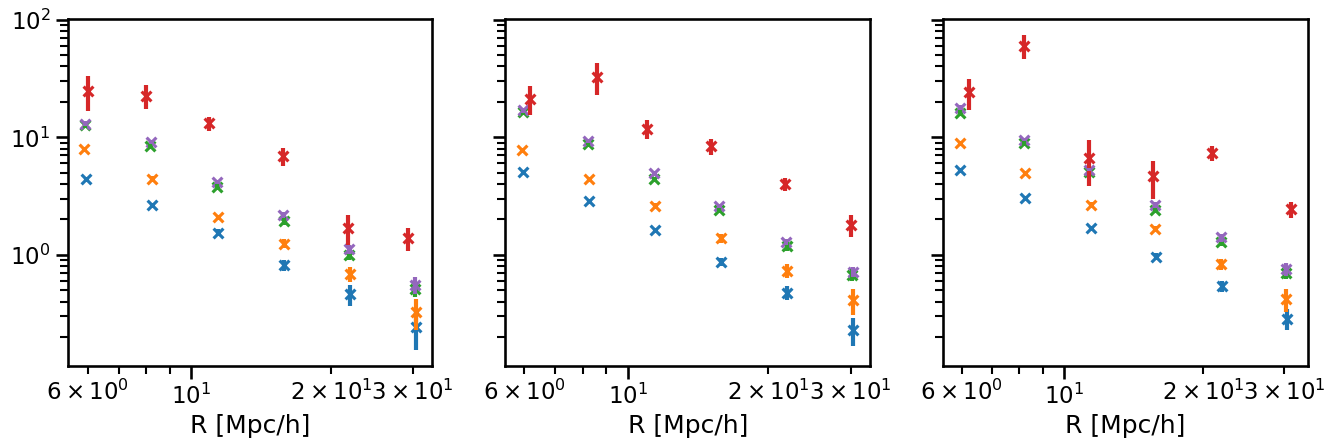

In [16]:
fig, axs = plt.subplots(1,3,figsize=(16,4.5),sharey='all')

for j in range(3):
    ax = axs[j]
    ax.set_yscale('log')
    ax.set_xscale('log')
    for i in range(5):
        ax.set_xlabel('R [Mpc/h]')
        plot_profile(vecs, lbdmeans[i], zmeans[j], ax=ax)
        # plt.title('zmean: %.3f'%zmeans[i])
        # ax.set_xlabel(r'$\theta$ (arcmin)')
        # plt.xlim(2.0, )
        # plt.legend(fontsize=12)
    
# ax.set_ylim(0.001)

(0.03, 1)

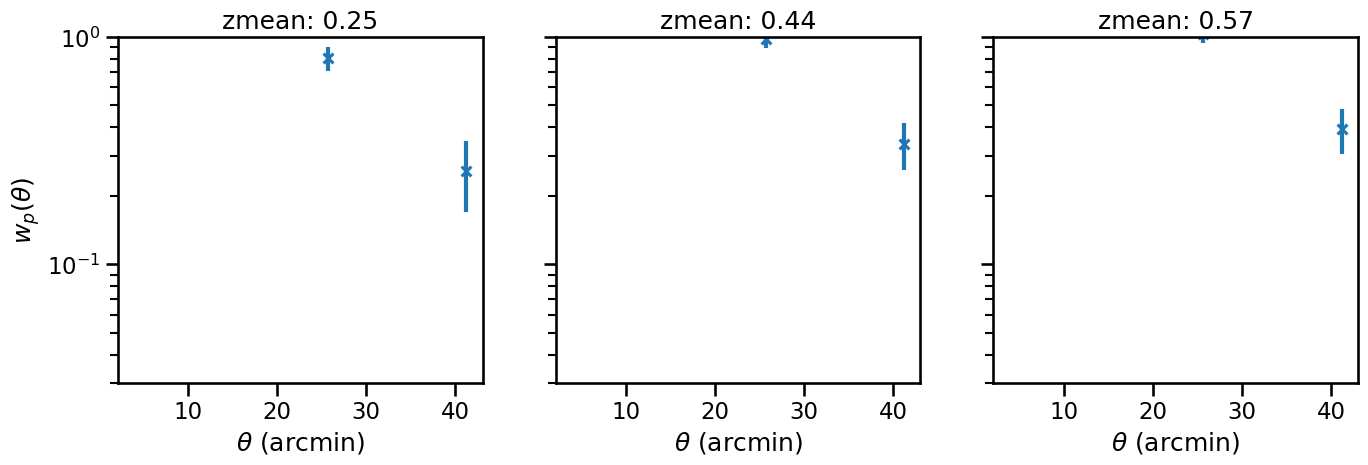

In [10]:
fig, axs = plt.subplots(1,3,figsize=(16,4.5),sharey='all')
for j in range(3):
    ax = axs[j]
    ax.set_yscale('log')
    #for i in range(4):
    #plt.xlabel('R [Mpc/h]')
    plot_profile(vecs, 1000, zmeans[j], ax=ax)
    ax.set_title('zmean: %.2f'%zmeans[j])
    ax.set_xlabel(r'$\theta$ (arcmin)')
    # plt.xlim(2.0, )
    # plt.legend(fontsize=12)
axs[0].set_ylabel(r'$w_p(\theta)$')
ax.set_ylim(0.03, 1)

In [11]:
lbdmeans[0]

7.5

Text(0, 0.5, '$\\sigma_{\\rm JK}(w_p)/w_p$')

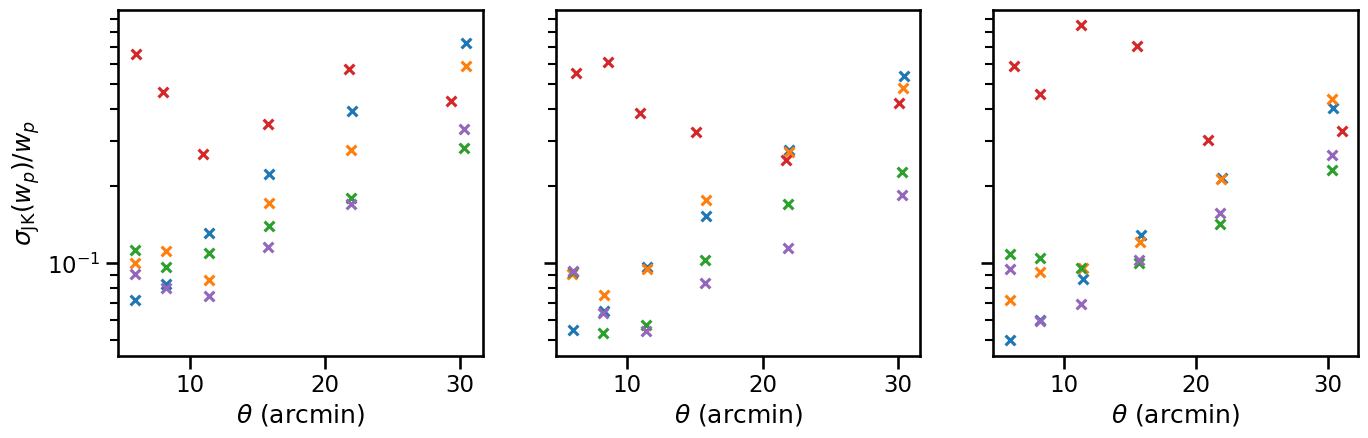

In [12]:
fig, axs = plt.subplots(1,3,figsize=(16,4.5),sharey='all')

for j in range(3):
    ax = axs[j]
    ax.set_yscale('log')
    #ax.set_xscale('log')
    for i in range(5):
        #plt.xlabel('R [Mpc/h]')
        plot_sigma(vecs, lbdmeans[i], zmeans[j], ax=ax)
        # plt.title('zmean: %.3f'%zmeans[i])
        ax.set_xlabel(r'$\theta$ (arcmin)')
        # plt.xlim(2.0, )
        # plt.legend(fontsize=12)
    
axs[0].set_ylabel(r'$\sigma_{\rm JK}(w_p)/w_p$')

Text(0, 0.5, '$\\sigma_{\\rm JK}(w_p)/w_p$')

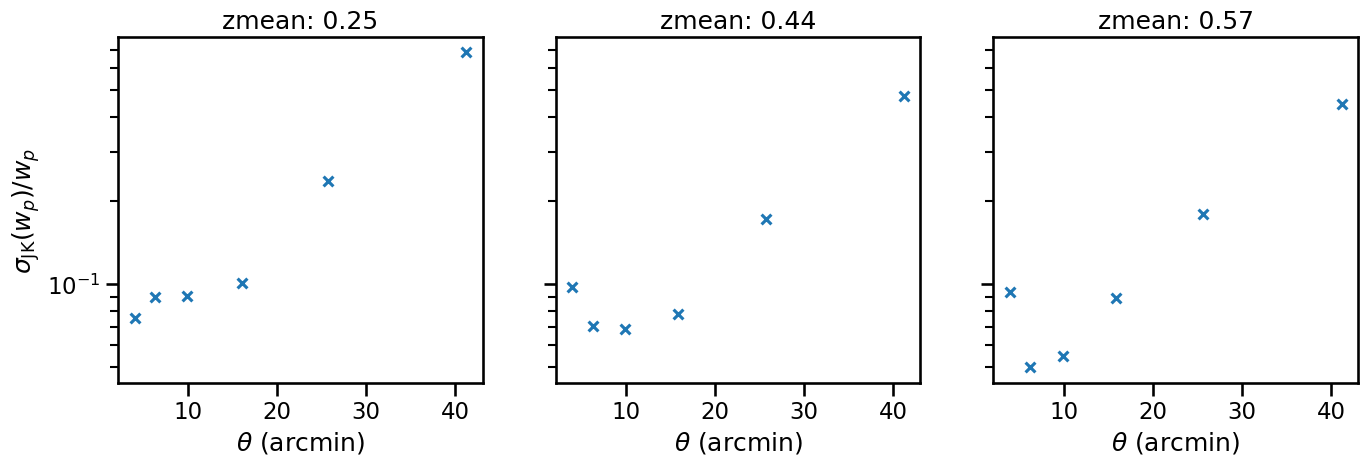

In [13]:
fig, axs = plt.subplots(1,3,figsize=(16,4.5),sharey='all')
for j in range(3):
    ax = axs[j]
    ax.set_yscale('log')
    #for i in range(4):
    #plt.xlabel('R [Mpc/h]')
    plot_sigma(vecs, 1000, zmeans[j], ax=ax)
    ax.set_title('zmean: %.2f'%zmeans[j])
    ax.set_xlabel(r'$\theta$ (arcmin)')
    # plt.xlim(2.0, )
    # plt.legend(fontsize=12)
axs[0].set_ylabel(r'$\sigma_{\rm JK}(w_p)/w_p$')
# ax.set_ylim(0.03, 1)